DATA COLLECTION

In [22]:
import numpy as np #Numeric Python used for Scientific Computing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt #2-D plotting library 
%matplotlib inline #For showing plot in Jupyter.
bos1 = pd.read_csv('BostonHousing.csv')

DATA ANALYSIS AND WRANGLING

In [ ]:
bos1.head()
bos1.tail()
bos1.dtypes # Because Linear regression supports numerical datatype
bos1.shape
bos1.describe()
bos1.isnull().sum()

VISUALIZATION

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

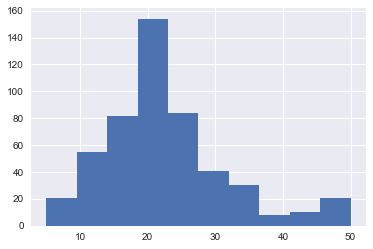

In [23]:
plt.hist(bos1['medv'])

In [24]:
x = bos1.iloc[:,0:13]
y = bos1["medv"]

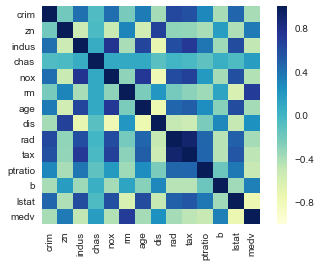

In [25]:
#code to plot correlation

#librarry to establish correlation
import seaborn as sns
correlations = bos1.corr()  #creating a correlation matrix
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

FEATURE SELECTION

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif # VIF Values > 10 Multicolinearity problem

,VIF,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


TRAIN AND TEST SPLIT

In [27]:
from sklearn.cross_validation import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

In [28]:
x_train.shape
x_test.shape
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
242,0.10290,30.0,4.93,0,0.428,6.358,52.9,7.0355,6,300,16.6,372.75,11.22
461,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,391.43,14.65


In [29]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)
pred_y = lm.predict(x_test)

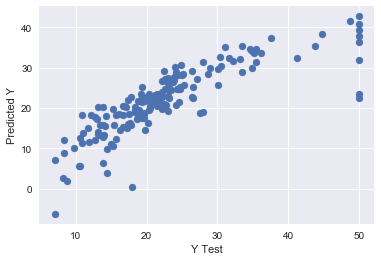

In [30]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

ACCURACY

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,pred_y))
print('MSE:',metrics.mean_squared_error(y_test,pred_y))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_y)))

MAE: 3.45503493225
MSE: 28.530458766
RMSE: 5.34139108903


In [37]:
# Coefficient of determination R2 - Explained Variance/(Explained Variance+UnExplained Variance) 
#Adding more and more variable in our model will increase the R2 value
# Need to take Adjusted R2
model.score(x_train,y_train)

0.7551332741779998

In [38]:
model.score(x_test,y_test)

0.69565516561115603

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,pred_y)

0.69565516561115603

In [ ]:
#Box-Cox Transformation / Power Transformation
#Reducing the spread
#If we have skew distribution them take log transformation
#bos1['logmedv']=np.log(boston['medv'])
#plt.hist(bos1['logmedv'])

In [32]:
x.columns # Columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [33]:
model.coef_ # Slope y = m1x1+m2x2+m3x3+c   m1m2m3 - Slope

array([ -1.56381297e-01,   3.85490972e-02,  -2.50629921e-02,
         7.86439684e-01,  -1.29469121e+01,   4.00268857e+00,
        -1.16023395e-02,  -1.36828811e+00,   3.41756915e-01,
        -1.35148823e-02,  -9.88866034e-01,   1.20588215e-02,
        -4.72644280e-01])

In [34]:
model.intercept_   #c - Intercept

32.858932634085306